In [1]:
from planet4 import region_data, p4io as io, helper_functions

# per region

In [6]:
def process_region(args):
    from planet4 import region_data, p4io as io, helper_functions
    regionclass, season = args
    try:
        imagenames = getattr(regionclass, season)
    except AttributeError:
        return "No {} data for region {} in PlanetFour.".format(season, regionclass)
    print(imagenames)
    df = io.get_list_of_image_names_data(imagenames)
    return "Status for {}, {}: {}".format(regionclass,
                                          season,
                                          helper_functions.get_status_per_classifications(df))

In [7]:
processlist = []
for season in ['season'+str(i) for i in range(1,5)]:
    for region in [region_data.Manhattan]:
        processlist.append((region, season))

In [8]:
from ipyparallel import Client
c = Client()
lbview = c.load_balanced_view()

In [9]:
import sys
for region in region_data.regions:
    print(region)
    sys.stdout.flush()
    processlist = []
    for season in ['season'+str(i) for i in range(1,5)]:
        processlist.append((region, season))
    res = lbview.map_async(process_region, processlist)
    for result in res.result:
        print(result)

<class 'planet4.region_data.Giza'>
Status for <class 'planet4.region_data.Giza'>, season1: 16.5
Status for <class 'planet4.region_data.Giza'>, season2: 276.4
Status for <class 'planet4.region_data.Giza'>, season3: 271.3
Status for <class 'planet4.region_data.Giza'>, season4: nan
<class 'planet4.region_data.Inca'>
Status for <class 'planet4.region_data.Inca'>, season1: 99.8
Status for <class 'planet4.region_data.Inca'>, season2: 270.1
Status for <class 'planet4.region_data.Inca'>, season3: 277.9
Status for <class 'planet4.region_data.Inca'>, season4: 98.9
<class 'planet4.region_data.Ithaca'>
Status for <class 'planet4.region_data.Ithaca'>, season1: 63.2
Status for <class 'planet4.region_data.Ithaca'>, season2: 268.0
Status for <class 'planet4.region_data.Ithaca'>, season3: 265.3
No season4 data for region <class 'planet4.region_data.Ithaca'> in PlanetFour.
<class 'planet4.region_data.Manhattan'>
Status for <class 'planet4.region_data.Manhattan'>, season1: 99.0
No season2 data for region

# per image_name (= hirise obs_id)

In [3]:
from planet4 import p4io as io

In [10]:
# image_names = io.get_all_image_names()
# image_names = image_names.image_name.unique()
# with open('current_image_names.pkl', 'wb') as f:
#     pickle.dump(image_names, f)

In [4]:
image_names = io.get_image_names_from_db(io.get_current_database_fname())

In [5]:
from planet4 import helper_functions as hf

In [13]:
def process_image_name(image_name):
    from planet4 import helper_functions as hf
    from planet4 import io
    df = io.get_image_name_data(image_name)
    status = hf.get_status_per_classifications(df)
    return image_name, status

In [13]:
def process_image_name(image_name):
    from planet4 import helper_functions as hf
    from planet4 import p4io as io
    df = io.get_image_name_data(image_name)
    no_done = hf.get_no_tiles_done(df)
    return {'image_name': image_name, 'no_done': no_done}

In [14]:
from ipyparallel import Client
c = Client()
lbview = c.load_balanced_view()

In [15]:
results = lbview.map_async(process_image_name, image_names)

In [16]:
for result in results:
    print(result)

{'image_name': 'ESP_011544_0985', 'no_done': 126}
{'image_name': 'ESP_021684_0985', 'no_done': 633}
{'image_name': 'ESP_011697_0980', 'no_done': 181}
{'image_name': 'ESP_020322_0930', 'no_done': 108}
{'image_name': 'ESP_021455_0935', 'no_done': 315}
{'image_name': 'ESP_020214_0935', 'no_done': 136}
{'image_name': 'ESP_012008_0975', 'no_done': 359}
{'image_name': 'ESP_020930_0980', 'no_done': 268}
{'image_name': 'ESP_020357_0950', 'no_done': 290}
{'image_name': 'ESP_012884_0935', 'no_done': 90}
{'image_name': 'ESP_021497_0980', 'no_done': 409}
{'image_name': 'ESP_011900_0985', 'no_done': 144}
{'image_name': 'ESP_012291_0980', 'no_done': 144}
{'image_name': 'ESP_021494_0945', 'no_done': 360}
{'image_name': 'ESP_021454_0925', 'no_done': 314}
{'image_name': 'ESP_021522_0930', 'no_done': 360}
{'image_name': 'ESP_020339_0985', 'no_done': 182}
{'image_name': 'ESP_012604_0965', 'no_done': 142}
{'image_name': 'ESP_012254_1065', 'no_done': 454}
{'image_name': 'ESP_021605_0985', 'no_done': 359}
{

In [17]:
df = pd.DataFrame(results.result)
df = df.set_index('image_name')
df

,no_done
image_name,
ESP_011544_0985,126
ESP_021684_0985,633
ESP_011697_0980,181
ESP_020322_0930,108
ESP_021455_0935,315
ESP_020214_0935,136
ESP_012008_0975,359
ESP_020930_0980,268
ESP_020357_0950,290


In [18]:
df.no_done.sum()

57442

In [30]:
%matplotlib nbagg

In [42]:
df = df.drop('tutorial')

<IPython.core.display.Javascript object>


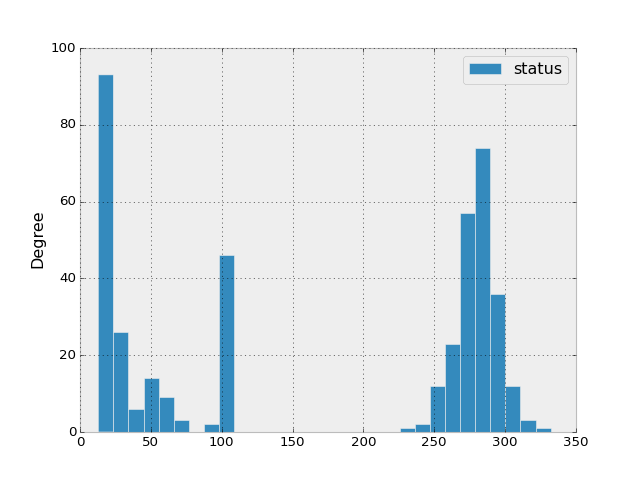

In [44]:
df.plot(kind='hist',bins=30)

In [19]:
df = pd.read_hdf('image_name_status.h5','df')

In [20]:
df.head()

,status
image_name,
ESP_011544_0985,283.2
ESP_021684_0985,289.2
ESP_011697_0980,268.2
ESP_020322_0930,246.6
ESP_021455_0935,263.7
